# New Synthetic Data Method 3
## Synthetic Data Generation - SDV python library

### Introduction

In this notebook we will introduce you to SDV python library for generating synthetic dataset. Private Technology for Financial Intelligence needs synthetic data to be able to implement the private technologies such as differential privacy and others. We need to be able to obtain financial data but due to privacy concerns and regulation these type of dataset are unavailable. A solution to this problem is to generate synthetic dataset which resemble real financial data. The SDV python library is very good at generating synthetic but it also tries to replicate statistical properties of real world dataset.

Generating synthetic data involves creating a dataset that mimics the statistical distribution of a real-world dataset. To achieve this, we first analyze the distribution (e.g., normal, exponential, chi-square) of the actual data. Then, we create a synthetic dataset with similar characteristics. This process helps us model and understand the behavior of the original data without relying solely on the real observations.

GANs (Generative Adversarial Networks): GANs consist of two neural networks—the generator and the discriminator. The generator creates synthetic data, while the discriminator evaluates whether it’s real or fake. GANs excel in image generation, data augmentation, and anomaly detection. Challenges include mode collapse and training instability. Researchers aim to improve stability and explore conditional GANs.

DataCebo is the developer of SDV. It orginated from MIT Data to AI Lab which was created in 2016. The Synthetic Data Vault (SDV), is a powerful Python library for synthetic data. This library serves as a one-stop solution for generating synthetic data.

**References:**



*   https://github.com/sdv-dev/SDV
*   https://sdv.dev/SDV/
*  https://github.com/sdv-dev/CTGAN
*   https://colab.research.google.com/drive/1F3WWduNjcX4oKck6XkjlwZ9zIsWlTGEM?usp=sharing#scrollTo=ZwdD7psYFOYL
* https://github.com/sdv-dev/CTGAN
* https://www.kaggle.com/datasets/vysakhvms/dataset/data





### Install the SDV packages

In [ ]:
#install the CTGAN
!pip install ctgan

In [ ]:
#Install the evaluator
!pip install table_evaluator

#Financial data: Insurance

Insurance fraud involves deceptive practices related to insurance. It encompasses exaggerating legitimate claims, intentionally misrepresenting information, and organised manipulation of the claims process. Opportunistic fraud occurs when individuals overstate losses, while premeditated fraud involves planned schemes by professional fraudsters. Insurance fraud is a serious offense, punishable by imprisonment and fines. Detecting and preventing benefits all consumers by reducing overall costs and maintaining fair premiums.

Banks in Australia offer various services where is health insurance is a major part of their business. In Australia, private health insurance plays a significant role in the financial services sector.

In [3]:
# Import insurance dataset

import pandas as pd
data = pd.read_excel('/content/insurance.xls')

#Print first five rows
print(data.head())


   Age  Gender Insurance_Type  Claim_Amount  Diagnosis_Code  Treatment_Code  \
0   62  Female         Health  15216.582539             131            5733   
1   65  Female           Auto  10000.010000             505            5725   
2   71  Female           Home  14838.511761             907            8067   
3   18    Male         Health  10922.981975             256            9255   
4   21    Male         Health  15372.064162             539            2130   

   Hospital_Code  Doctor_Fee Policy_Type  Fraudulent_Claim  
0             77  646.464587       Basic                 0  
1             22  976.754644       Basic                 0  
2             54  216.533344     Premium                 0  
3             28  451.173165       Basic                 0  
4             29  288.030168       Basic                 0  


## Explorative Data Analysis

Exploratory Data Analysis is a fundamental process in data science that involves analysing and investigating data to understand essential characteristics of the dataset. We need to first understand the insurance dataset and its underlying characteristics. This is important part when creating own synthethic dataset.

Insurance data information:

In the dataset shape consists of 10000 records with 10 variables. The variables are Age, Gender, Insurance_Type, Claim_Amount, Diagnosis_Code, Treatment_Code, Hospital_Code, Doctor_Fee, Policy_Type, and Fraudulent_Claim. The data types are integer, object (categorical), and float. The data above is consistent with what we observe below.

In [4]:
# The dimension of the insurance dataset

print("Type  of data: ", type(data))
print("Shape of data: ", data.shape)
print("----------------------------------------------")
print("----------------------------------------------")
print("Data information:", data.info())

Type  of data:  <class 'pandas.core.frame.DataFrame'>
Shape of data:  (10000, 10)
----------------------------------------------
----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               10000 non-null  int64  
 1   Gender            10000 non-null  object 
 2   Insurance_Type    10000 non-null  object 
 3   Claim_Amount      10000 non-null  float64
 4   Diagnosis_Code    10000 non-null  int64  
 5   Treatment_Code    10000 non-null  int64  
 6   Hospital_Code     10000 non-null  int64  
 7   Doctor_Fee        10000 non-null  float64
 8   Policy_Type       10000 non-null  object 
 9   Fraudulent_Claim  10000 non-null  int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB
Data information: None


Missing data:

There is no missing values observed in the dataset.

In [ ]:
# Count the number of missing values for each column

print("Is there missing values in the dataset")
print("--------------------------------------")
print("--------------------------------------")
data.isnull().sum()

There is missing values in the dataset
--------------------------------------
--------------------------------------


Age                 0
Gender              0
Insurance_Type      0
Claim_Amount        0
Diagnosis_Code      0
Treatment_Code      0
Hospital_Code       0
Doctor_Fee          0
Policy_Type         0
Fraudulent_Claim    0
dtype: int64

Description of the dataset:

**Key findings**:

* **Age**: The average age of policyholders in the dataset is approximately 48.5
years, with a standard deviation of around 17.9 years. The youngest policyholder is 18 years old, while the oldest is 79 years.

* **Claim Amount**: The mean claim amount is approximately 15,552 dollars, with a standard deviation of about 4,320 dollars. The minimum claim amount is 10,000.01 dollars, and the maximum reaches 35,363.90 dollars.

* **Diagnosis Code**: The average diagnosis code is around 549, with a standard deviation of approximately 260. The lowest diagnosis code is 100, and the highest is 999.

* **Treatment Code**: The mean treatment code is approximately 5,515, with a standard deviation of about 2,581. The lowest treatment code is 1,000, and the highest is 9,998.

* **Hospital Code**: The average hospital code is approximately 50, with a standard deviation of around 28.7. The lowest hospital code is 1, and the highest is 99.

* **Doctor Fee**: The mean doctor fee is approximately 502, with a standard deviation of about 196. The lowest fee is 100, and the highest is 1,270.

These insight provides a snapshot of the data distribution within the insurance dataset. Remember these insight are very important for creating synthetic datasets.

In [ ]:
# Descriptive Statistics
print("Insurance dataset descriptive statistics: ")
print("----------------------------------------------")
print("----------------------------------------------")
print(data.describe().transpose())
print("----------------------------------------------")
print("----------------------------------------------")
print("Categorical data descriptive statistics: ")
print(data.describe(include='object').transpose())

Insurance dataset descriptive statistics: 
----------------------------------------------
----------------------------------------------
                    count          mean          std       min           25%  \
Age               10000.0     48.474300    17.894948     18.00     33.000000   
Claim_Amount      10000.0  15552.516019  4320.615526  10000.01  11802.364333   
Diagnosis_Code    10000.0    549.010500   260.200451    100.00    322.000000   
Treatment_Code    10000.0   5514.909000  2581.418015   1000.00   3303.750000   
Hospital_Code     10000.0     50.065900    28.737772      1.00     25.000000   
Doctor_Fee        10000.0    502.942220   195.883403    100.00    364.922353   
Fraudulent_Claim  10000.0      0.050000     0.217956      0.00      0.000000   

                           50%           75%           max  
Age                  49.000000     64.000000     79.000000  
Claim_Amount      15134.045561  18469.750642  35363.897863  
Diagnosis_Code      549.000000    776.0

## Visualisation for Data Analysis

In this section we will explore data visualisation techniques to gain insights from the dataset. Visualisations allow us to present data in a more intuitive and informative manner.

In the context of creating a model, the target variable of interest is whether a claim is fraudulent or not. Visualizing this, we observe that out of a total of 10,000 claims:

* 9,500 claims are non-fraudulent (labeled as 0), constituting 95% of the dataset.
* 500 claims are fraudulent (labeled as 1), making up the remaining 5%.

This distribution aligns with our expectations: most claims are legitimate, while only a minority fall into the fraudulent category. Such insights are crucial for building effective fraud detection models.



<ipython-input-9-fa7eeee168d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraudulent_Claim', data=data, palette='coolwarm')


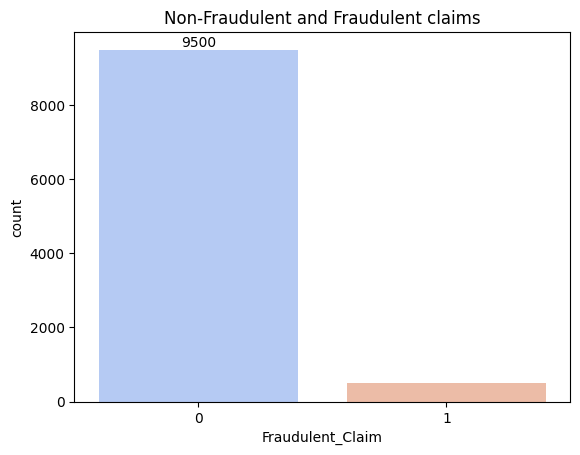

In [9]:
#import libraries for making plots
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the 'Fraudulent_Claim' column with different colors
sns.countplot(x='Fraudulent_Claim', data=data, palette='coolwarm')

# Add percentages on top of bars
plt.bar_label(plt.gca().containers[0])

# Show the plot
plt.title('Non-Fraudulent and Fraudulent claims')
plt.show()

When creating synthetic datasets, understanding the distribution of variables is crucial. Histograms provide valuable insights into the shape of these distributions. By visualizing the frequency of different values, histograms reveal patterns such as symmetry, skewness, or multimodality. For instance, a bell-shaped histogram suggests a normal distribution, while a skewed one indicates asymmetry. These insights guide data generation, ensuring that synthetic datasets mimic real-world characteristics effectively. In summary, histograms serve as a powerful tool for shaping synthetic data to match the underlying distribution of the variable of interest.

In [ ]:
#Import seaborn library
import seaborn as sns

#plot visual exploration of pairwise relationship within a dataset.
sns.pairplot(data, diag_kind='kde')

# Creating Synthetic dataset

In this section, we’ll begin generating a synthetic dataset, using the insurance dataset as our real-world reference.

First we highlight the categorical data.

In [10]:
# Categorical data
categorical_features = ['Gender', 'Insurance_Type','Policy_Type']

##Synthetic data

Generative Adversarial Networks (GANs): At its core, CTGAN employs a type of neural network called a GAN. GANs consist of two competing networks: the generator and the discriminator.



*   The generator creates synthetic data that aims to fool the discriminator.
*   The discriminator tries to distinguish between real and synthetic data.
*   These networks iteratively improve each other by minimizing their respective loss values during training.

CTGAN learns from real data catching the undrlying statistical patterns. CTGAN generates synthetic data with similar statistical properties using the learned knowledge. CTGAN underlying model uses deep learning techniques like neural networks



In [11]:
#import ctgan library
from ctgan import CTGAN

# run the neural network model to learn the underlying statistical properties
ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (-2.54) | Discrim. (0.01): 100%|██████████| 200/200 [05:59<00:00,  1.80s/it]



Keep in mind that this synthetic data is not real but mimics the statistical properties of the original dataset. It can be useful for various purposes, such as privacy-preserving research and testing algorithms. We generated a synthetic data with 1000 records with the same variables as the original data.

In [16]:
#Generate a synthetic data of 1000 records
samples = ctgan.sample(10000)
samples.head()

,Age,Gender,Insurance_Type,Claim_Amount,Diagnosis_Code,Treatment_Code,Hospital_Code,Doctor_Fee,Policy_Type,Fraudulent_Claim
0,70,Female,Home,11389.503114,917,2376,23,780.687170,Basic,0
1,64,Female,Home,13773.413868,351,8773,36,436.779321,Standard,0
2,57,Male,Auto,10361.382890,542,8389,44,248.681181,Standard,0
3,50,Male,Health,16799.069697,440,6520,80,748.145240,Basic,0
4,50,Female,Auto,15504.857910,685,6875,47,424.683391,Premium,0


#Evaluation


(10000, 10) (10000, 10)


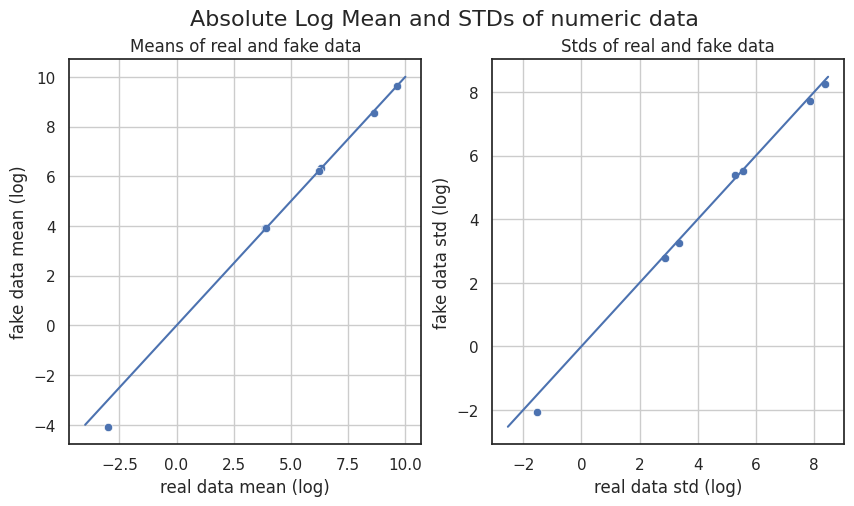

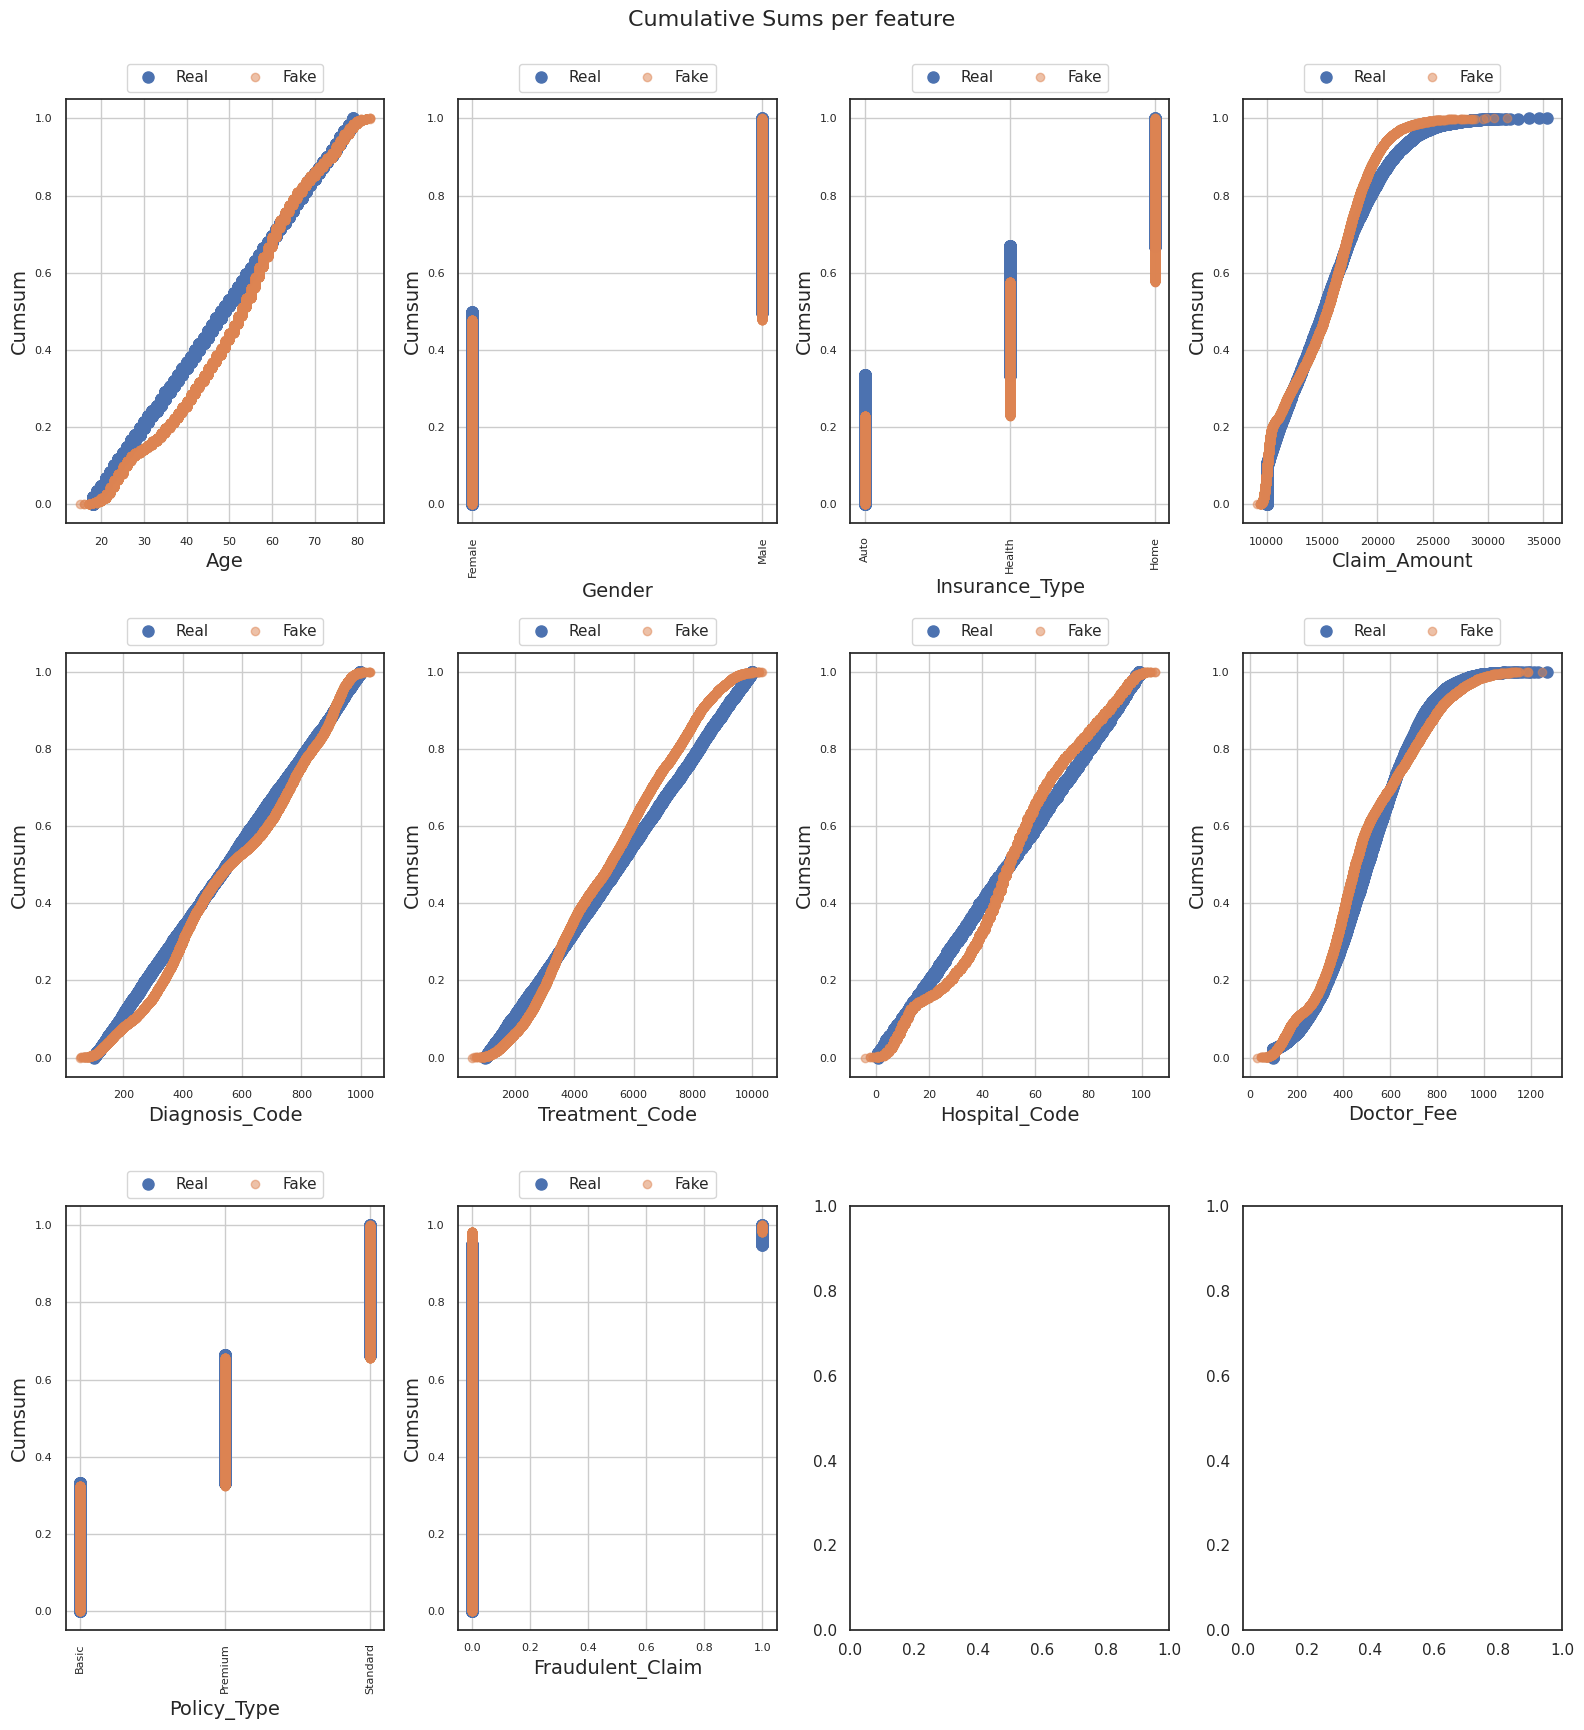

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')


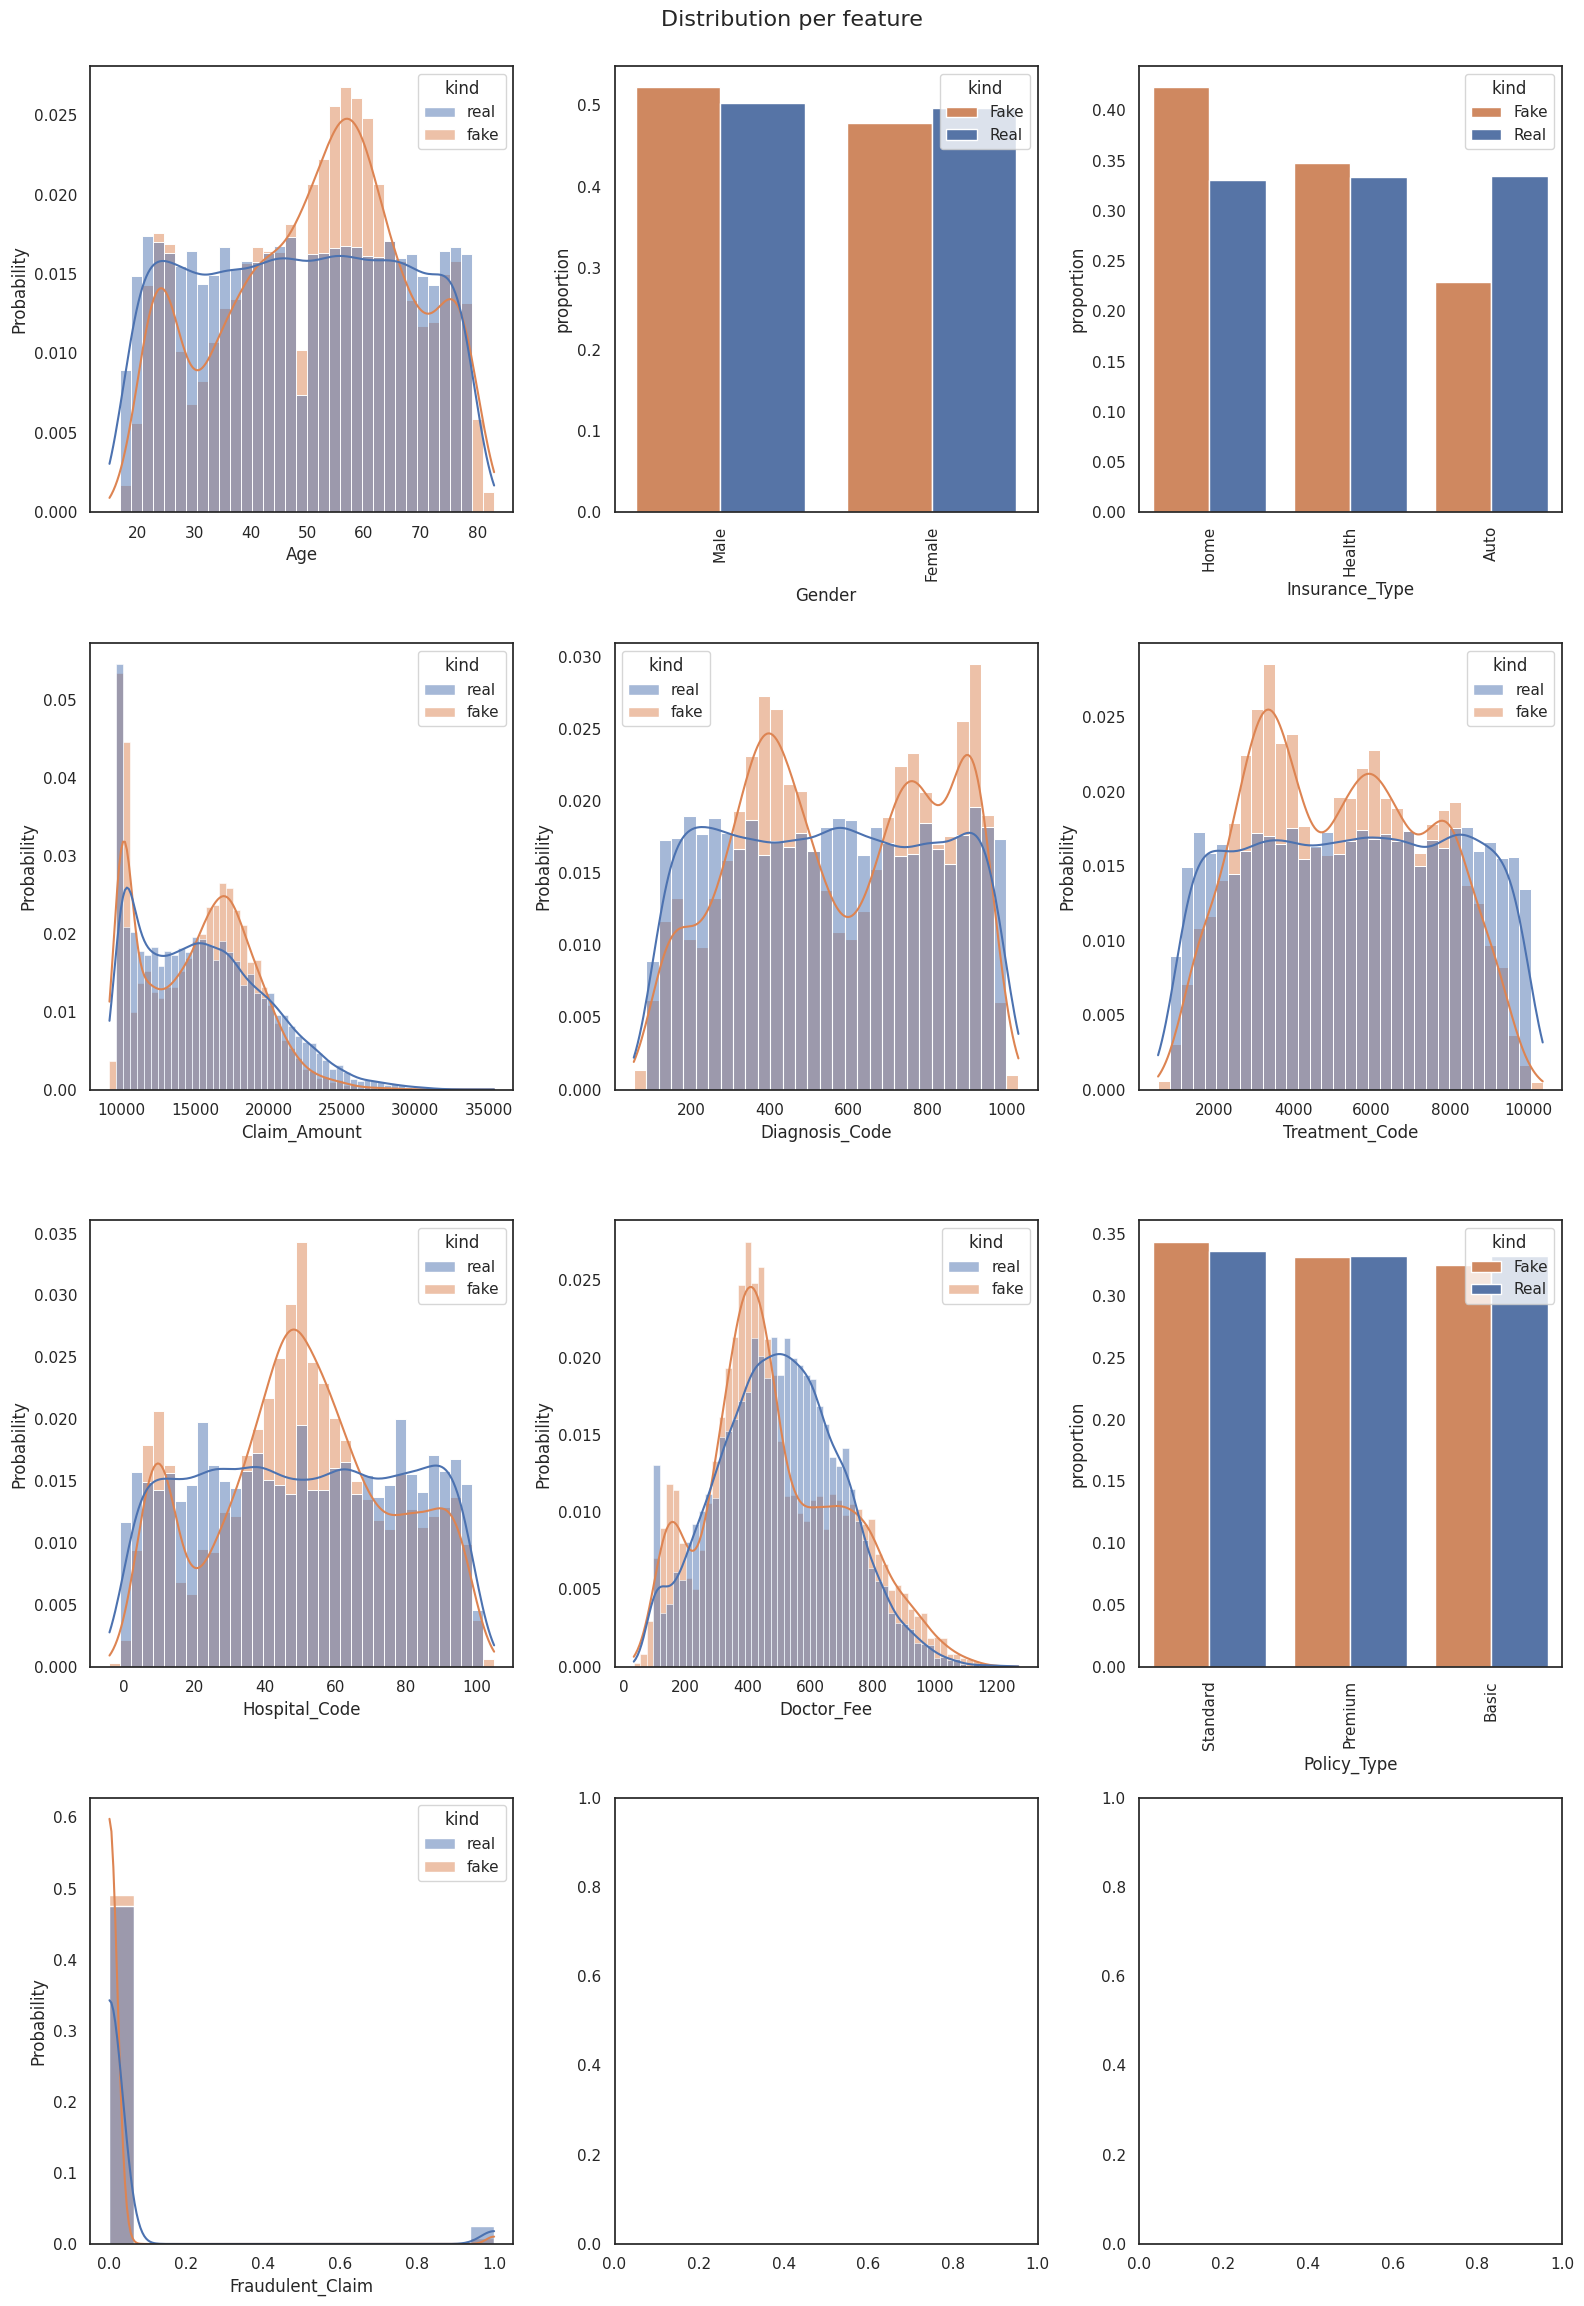

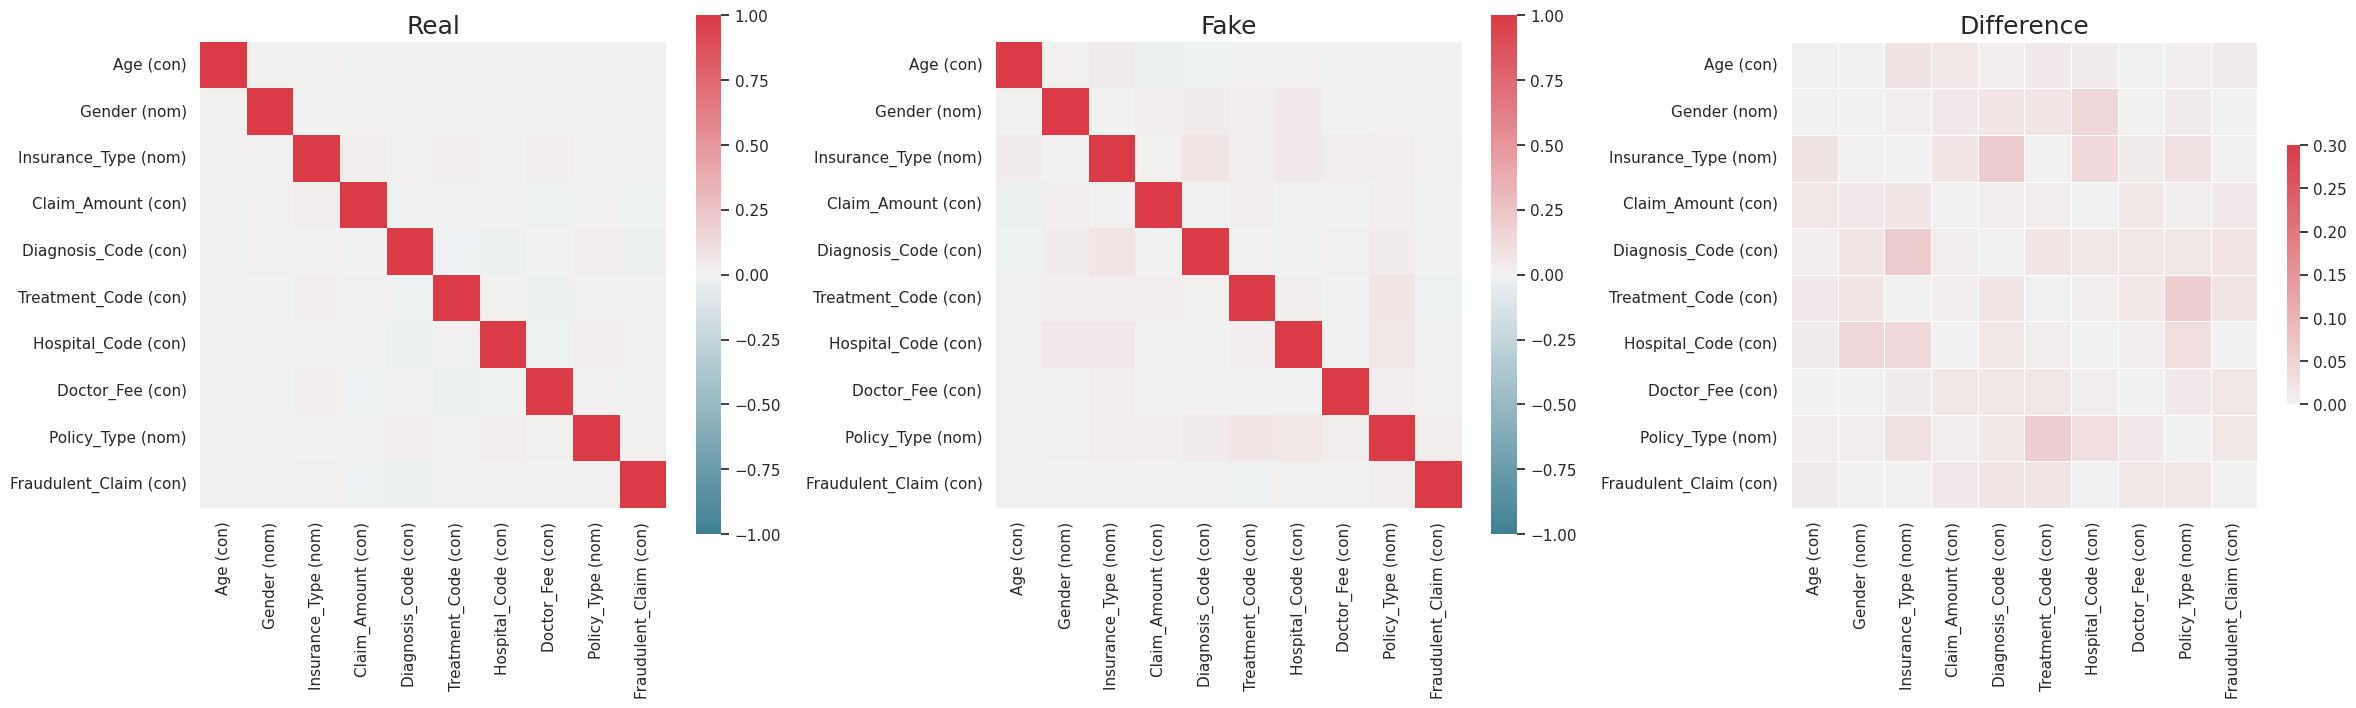

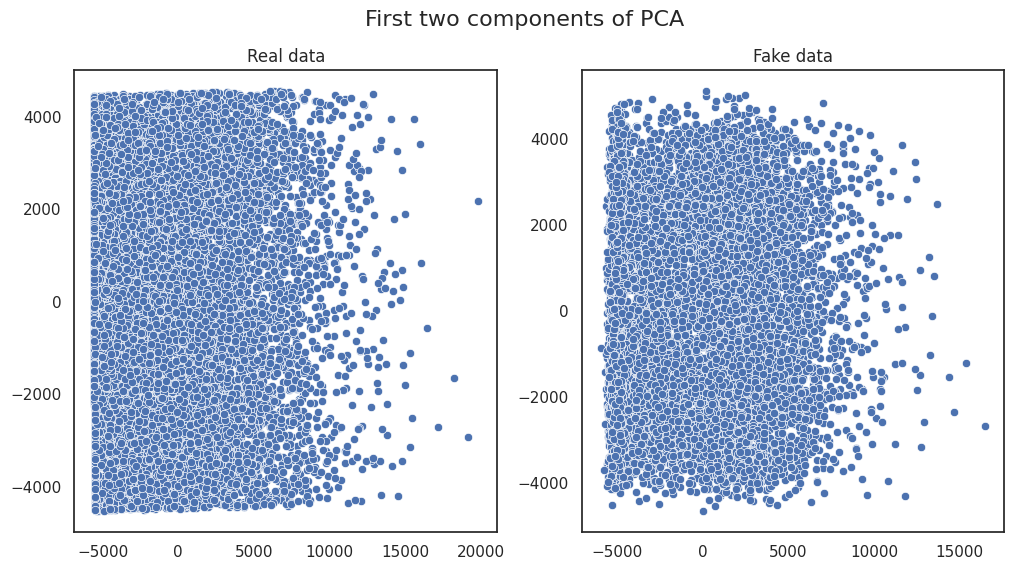

In [17]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()

#Recommendation

The evaluation visualizations demonstrate a remarkable similarity between the original insurance dataset and the synthetic data generated by CTGAN. CTGAN, a machine learning-based approach, effectively learns intricate patterns from the real data and realistically replicates them in the synthetic dataset. This method is particularly well-suited for our project's goal of generating high-quality synthetic data that closely mirrors the characteristics of the original insurance records. By leveraging CTGAN, we can confidently create synthetic data that maintains statistical properties.

While it has been successfully applied to insurance records, its versatility extends beyond this example. PTFI can explore how we can leverage CTGAN for other financial datasets.